# Spectral clustering

In this notebook we will explore spectral clustering  can be used to cluster neonatal brain MRI.

First import the basic libraries by running the cell below

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

### Identify preterm and term scans

We will start by exploring a dataset that contains MRI images of preterm babies. Each baby was scanned twice, and our task is to automatically identify first and second scan in a database of the preterm babies using a clustering method. We have volumes of 86 structures to recognise the scans.

Here is the information about the patients:
* **Preterm:** born before 37 weeks GA
* **First scan**: within 4 weeks of birth
* **Second scan**: between 38 and 43 weeks GA

First we will load the dataset and visualise its structure of the dataset using `PCA`, the same way as in the previous notebook. Run the cell below to do that. Can you observe two clusters?

Number of samples: 36  Number of features: 86


Text(0, 0.5, 'component 2')

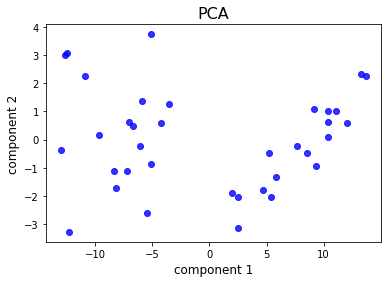

In [2]:
# load data
data = pd.read_csv("datasets/structures_first_second_scan.csv",header=None)
structure_volumes = data.to_numpy()

# Create features
X = StandardScaler().fit_transform(structure_volumes[:,1:])

# We have information about the first or second scan for comparison 
y = structure_volumes[:,0]

print('Number of samples: {}  Number of features: {}'.format(X.shape[0],X.shape[1])) 

# Apply PCA to reduce to two dimension and plot the data
from sklearn.decomposition import PCA
pca = PCA( n_components = 2) 
X2 = pca.fit_transform(X)
plt.plot(X2[:,0],X2[:,1],'bo', alpha = 0.8)
plt.title('PCA', fontsize = 16)
plt.xlabel('component 1', fontsize = 12)
plt.ylabel('component 2', fontsize = 12)

At this point we can simply apply k-means algorithm or Gaussian Mixture model to the whole or PCA transformed dataset. Run in the code below and to see the result. We also calculate the accuracy compared to the ground truth labels to see whether clustering worked.

Accuracy score:  0.0
Accuracy score:  1.0


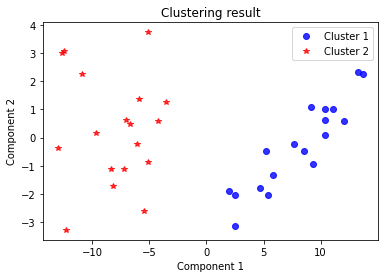

In [3]:
# predict using k-means
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2).fit_predict(X2)

# Calculate accuracy score
from sklearn.metrics import accuracy_score
print('Accuracy score: ', round(accuracy_score(y,y_pred),2))
print('Accuracy score: ', round(accuracy_score(y,1-y_pred),2))

# Plot
def PlotData(X,y):
    # plot
    plt.plot(X[y==0,0],X[y==0,1],'bo',alpha=0.8, label = 'Cluster 1')
    plt.plot(X[y==1,0],X[y==1,1],'r*',alpha=0.8, label = 'Cluster 2')
    # annotate
    plt.legend()
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Clustering result')

# Plot reduced dataset
PlotData(X2,y_pred)

Now we would like to explore how Spectral clustering will deal with this dataset. In Scikit-learn, we can do that using object `SpectralClustering`. 

**Activity 1:** 
* Create a `SpectralClustering` model. 
* Set number of clusters `n_clusters` to 2 
* Set number of components (dimension of the manifold embedding) `n_components` to 2 
* Set affinity to `'nearest_neighbors'`

In [4]:
# predict using spectral clustering
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, n_components=2, affinity = 'nearest_neighbors')

# check parameters 
print(model.n_clusters)
print(model.n_components)
print(model.affinity)
print(model.n_neighbors)

2
2
nearest_neighbors
10


In the code above we have used PCA to visualise the results of Spectral clustering in 2D representation of the feature space. We will now replace `PCA` with `SpectralEmbedding`. The cell below contains the parameters of the `SpectralClustering` model that we have just fitted. (If `n_components` is `None` then it is equal to `n_clusters`, check the default settings in help.)

In [5]:
print(model.n_clusters)
print(model.n_components)
print(model.affinity)
print(model.n_neighbors)

2
2
nearest_neighbors
10


**Activity 2:** Create the spectral embedding with the same parameters as `SpectralClustering` in activity 1 and use it to visualise the clustering instead of the PCA. 

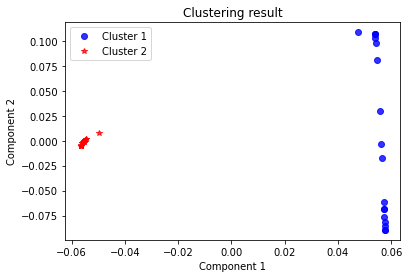

In [6]:
# Calculate spectral embedding
from sklearn.manifold import SpectralEmbedding
model=SpectralEmbedding(n_components=2, affinity='nearest_neighbors',n_neighbors = 10)
Xe = model.fit_transform(X)

# Plot reduced dataset
PlotData(Xe,y_pred)

**Activity 3:** Experiment with the number of components `n_components` of the embedded space to see whether that changes the results. What is the minimum number that works?

**Answer:** 

<img src="pictures/brain1.png" width = "100" style="float: right;">

# Exercise 4 (optional)

### Spectral clustering from precomputed matrices

<img src="pictures/brain2.png" width = "100" style="float: right;"> 

In this exercise we will demonstrate how we can cluster MRI images of the babies scanned at 40 week GA. The images of 68 term and preterm babies were first co-aligned to the same reference space. After that cross-corelation between all pairs of images was calculated to measure their similarity. The matrix of similarities (also called **affinity matrix**) is available in the file 'babies.csv'.

### Load the affinity matrix

<img src="pictures/brain3.png" width = "100" style="float: right;"> 

Load the affinity matrix by running the cell bellow and inspect it. Which value is on the diagonal and why?

**Answer:** We have 1 on the diagonal because cross-correlation of an image with itself is always 1.

In [7]:
import pandas as pd

# read the file
df = pd.read_csv('datasets/babies.csv', header=None)

# print the affinity matrix
df

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,1.000,0.677,0.650,0.577,0.706,0.699,0.683,0.686,0.705,0.681,...,0.537,0.698,0.615,0.659,0.621,0.564,0.676,0.638,0.674,0.656
1,0.677,1.000,0.642,0.580,0.732,0.724,0.685,0.702,0.751,0.716,...,0.589,0.720,0.615,0.658,0.634,0.590,0.684,0.653,0.694,0.654
2,0.650,0.642,1.000,0.623,0.712,0.693,0.653,0.725,0.723,0.730,...,0.448,0.693,0.570,0.672,0.658,0.504,0.673,0.584,0.640,0.653
3,0.577,0.580,0.623,1.000,0.633,0.617,0.585,0.612,0.602,0.620,...,0.470,0.606,0.546,0.592,0.624,0.498,0.614,0.558,0.577,0.599
4,0.706,0.732,0.712,0.633,1.000,0.740,0.687,0.740,0.783,0.748,...,0.522,0.727,0.590,0.674,0.645,0.539,0.709,0.619,0.677,0.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.564,0.590,0.504,0.498,0.539,0.614,0.633,0.551,0.594,0.573,...,0.664,0.640,0.702,0.664,0.609,1.000,0.681,0.722,0.678,0.641
64,0.676,0.684,0.673,0.614,0.709,0.724,0.711,0.700,0.736,0.715,...,0.602,0.752,0.705,0.754,0.709,0.681,1.000,0.732,0.753,0.736
65,0.638,0.653,0.584,0.558,0.619,0.687,0.695,0.641,0.658,0.667,...,0.643,0.700,0.712,0.733,0.677,0.722,0.732,1.000,0.750,0.691
66,0.674,0.694,0.640,0.577,0.677,0.734,0.722,0.676,0.715,0.706,...,0.590,0.759,0.709,0.748,0.699,0.678,0.753,0.750,1.000,0.720


Next we will convert to matrix from dataframe object to a numpy array. What is the dimension of this matrix and why?

**Answer:** We have a square matrix of dimension 68x68 because it holds similarities between all pairs of MRI, and we have 68 samples (scans) in our dataset.

In [8]:
# convert to numpy array
NCC=df.to_numpy()

# print the shape
NCC.shape

(68, 68)

### Visualise the dataset 

**Task 4.1:** Visualise the dataset defined by the affinity matrix by performing these steps:
* Calculate the `SpectralEmbedding` with 3 components and `precomputed` affinity matrix. Look in the help how to create the embedding model. 
* To fit the model, use the affinity matrix rather than the feature matrix in this case. 
* Once you have calculated the 3D feature matrix in the embedded space, plot the dataset in 2D using the first 2 embedded coordinates.

Text(0, 0.5, 'Embedded component 2')

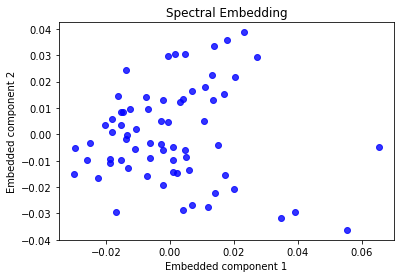

In [9]:
# Create the embedding
embedding=SpectralEmbedding(n_components=3, affinity='precomputed')

# Fit the model using the affinity matrix and calculate the feature matrix in the 3D embedded space
Xe = embedding.fit_transform(NCC)

# Plot the first two dimensions of the embedded space
plt.plot(Xe[:,0],Xe[:,1],'bo', alpha = 0.8)

# Annotate the plot
plt.title('Spectral Embedding')
plt.xlabel('Embedded component 1')
plt.ylabel('Embedded component 2')

### Perform spectral clustering

**Task 4.2:** Perform spectral clustering by following these steps:
* Create the `SpectralClustering` model with 3 components and 3 clusters
* Fit the model using the precomputed affinity matrix and predict the labels
* Complete the function `PlotData3` that plots the fitst two dimensions of the data with 3 clusters
* Plot the clustering result

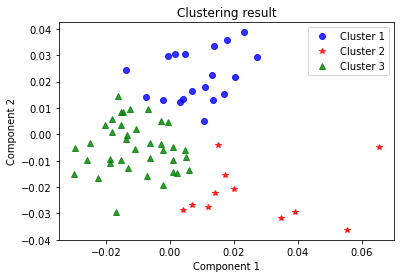

In [10]:
# Create spectral clustering model
clustering = SpectralClustering(n_components=3, n_clusters=3, affinity='precomputed')

# Fit and predict using the affinity matrix
y_pred = clustering.fit_predict(NCC)

# Function for plotting data with three clusters
def PlotData3(X,y):
    # plot
    plt.plot(X[y==0,0],X[y==0,1],'bo',alpha=0.8, label = 'Cluster 1')
    plt.plot(X[y==1,0],X[y==1,1],'r*',alpha=0.8, label = 'Cluster 2')
    plt.plot(X[y==2,0],X[y==2,1],'g^',alpha=0.8, label = 'Cluster 3')
    # annotate
    plt.legend()
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('Clustering result')

# Plot
PlotData3(Xe,y_pred)

### Interpret the clusters

**Task 4.3:** We will now load the file that stores the gestational age at birth for the 68 babies in our dataset. Your task is to plot the first two dimensions of the embedded dataset using `scatter` plot colour-coded by the GA at birth `ages`. Look at the code of the function `PlotDataColourcoded` above to see how we can do the colour-coding. How can you interpret the clusters?

**Answer:** The cluster 3 consists mainly of preterm babies. Clusters 1 and 2 do not seem to be related to differences in GA at birth.

Text(0.5, 1.0, 'Embedding colorcoded by age')

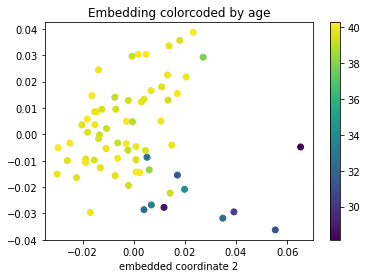

In [11]:
# Load GA and convert to numpy
df2 = pd.read_csv('datasets/ages.csv',header=None)
ages = df2.to_numpy()

# Scatterplot of the embedded space colour-coded by GA
plt.scatter(Xe[:,0],Xe[:,1],c=ages)

# annotate the plot
plt.colorbar()
plt.xlabel('embedded coordinate 1')
plt.xlabel('embedded coordinate 2')
plt.title('Embedding colorcoded by age')